<a href="https://colab.research.google.com/github/ds4ph-bme/project-5-HerambGupta/blob/main/project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
#from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from sklearn.linear_model import LinearRegression,LogisticRegression

#Question 1

Fit a pytorch model to the oasis data that treats gold lesions as the outcome and T2 value as the predictor. Use a bias term, sigmoid output activation function and no hidden layers. Do not split the data into a testing and training dataset. Demonstrate that the fitted values are the same as those obtained with logistic regression.

In [ ]:
#LOGISTIC REGRESSION
df=pd.read_csv('https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv')
x=df[['T2']]
x=np.asarray(x)
y=df.GOLD_Lesions
y=np.asarray(y)
log_reg=LogisticRegression().fit(x,y)
y_hat=log_reg.predict(x)

In [ ]:
#PYTORCH
from torch import nn
torch.manual_seed(10) # fix random number generator

xtorch = torch.from_numpy(x).float() 
ytorch = torch.from_numpy(y).float().unsqueeze(-1)

model=torch.nn.Sequential(
    nn.Linear(1,1,bias=True),
    nn.Sigmoid()
)

loss_fn = nn.MSELoss(reduction='sum')  
optimizer = torch.optim.SGD(model.parameters(), lr=5e-4)

for t in range(1000):

  ## Forward propagation
  y_pred = model(xtorch)

  ## the loss for this interation
  loss = loss_fn(y_pred, ytorch)

  ## Zero out the gradients before adding them up 
  optimizer.zero_grad()
  
  ## Backprop
  loss.backward()
  
  ## Optimization step
  optimizer.step()

y_hat_t=model(xtorch)
y_hat_t = y_hat_t.detach().numpy().reshape(-1)
flag=np.where(y_hat_t > 0.5, 1, 0)
acc=np.mean(flag==y_hat)
print('The Accuracy is ',format(acc))

The Accuracy is  1.0


#Question 2
Fit a pytorch neural network with two hidden layers on the diamond dataset from the previous project predicting price. Evaluate your predictions on held out test set data.

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv")
cut_oh=pd.get_dummies(df.iloc[:,1])
color_oh=pd.get_dummies(df.iloc[:,2])
clarity_oh=pd.get_dummies(df.iloc[:,3])

n_df=pd.concat([df,cut_oh,color_oh,clarity_oh],axis=1)
n_df=n_df.rename(columns={'Very Good':'VG'})

trainFraction = .75
sample = np.random.uniform(size = 53940) < trainFraction
train = n_df[sample]
test = n_df[~sample]

X_train=train.drop(['cut','table','color','clarity','depth','price','x','y','z'],axis=1).to_numpy()
X_test=test.drop(['cut','table','color','clarity','depth','price','x','y','z'],axis=1).to_numpy()
Y_test=test[['price']].to_numpy()
Y_train=train[['price']].to_numpy()

In [ ]:
Xtrain = torch.from_numpy(X_train).float() 
Ytrain = torch.from_numpy(np.array(Y_train).reshape(-1,1)).float()
Xtest= torch.from_numpy(X_test).float() 
Ytest = torch.from_numpy(np.array(Y_test).reshape(-1,1)).float()

In [ ]:
n=Xtrain.shape[0]
p=Xtrain.shape[1]
h1=64
h2=128
l1=nn.Linear(in_features=p,out_features=h1,bias=True)
l2=nn.ReLU()
l3=nn.Linear(in_features=h1,out_features=h2,bias=True)
l4=nn.ReLU()
l5=nn.Linear(in_features=h2,out_features=1,bias=True)

network = torch.nn.Sequential(l1,l2,l3,l4,l5)

In [ ]:
loss_fn = nn.MSELoss(reduction='sum')  
optimizer = torch.optim.Adam(network.parameters())
s=128

for t in range(1000):
    for j in range(n//s):
      y_pred=network(Xtrain[j*s: j*s+s])
      loss = loss_fn(y_pred, Ytrain[j*s : j*s+s])
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

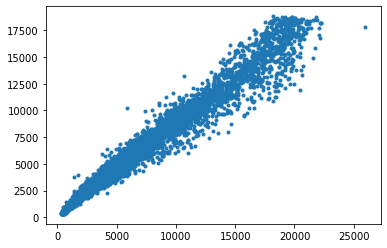

In [ ]:
yha=network(Xtest).detach().numpy()
plt.plot(yha,Ytest,'.')

In [ ]:
from sklearn.metrics import mean_squared_error
err=mean_squared_error(Ytest,yha)
print('The error is ',format(err))

The error is  945138.875
